# Discente:

Iuri Soares (20200067114)

# Importando pacotes, bibliotecas e dados

## Importando pacotes e bibliotecas

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from scipy.stats import norm
%matplotlib inline
import yfinance as yf

## Baixando dados da WEGE3

In [49]:
WEGE3 = yf.download(tickers='WEGE3.SA', start='2000-1-1')['Adj Close']
WEGE3

[*********************100%***********************]  1 of 1 completed


Date
2000-01-03     0.122103
2000-01-04     0.117818
2000-01-05     0.117818
2000-01-06     0.107107
2000-01-07     0.107107
                ...    
2023-11-27    34.139999
2023-11-28    34.369999
2023-11-29    34.130001
2023-11-30    34.189999
2023-12-01    34.720001
Name: Adj Close, Length: 6008, dtype: float64

# Calculando a variação percentual do preço da ação da Weg (WEGE3) usando o logaritmo natural

In [50]:
rtn_WEGE3 = np.log(1+WEGE3.pct_change())
rtn_WEGE3

Date
2000-01-03         NaN
2000-01-04   -0.035723
2000-01-05    0.000000
2000-01-06   -0.095311
2000-01-07    0.000000
                ...   
2023-11-27    0.012379
2023-11-28    0.006714
2023-11-29   -0.007007
2023-11-30    0.001756
2023-12-01    0.015383
Name: Adj Close, Length: 6008, dtype: float64

# Gráfico dos retornos logarítmicos da ação da Weg (WEGE3) ao longo do tempo

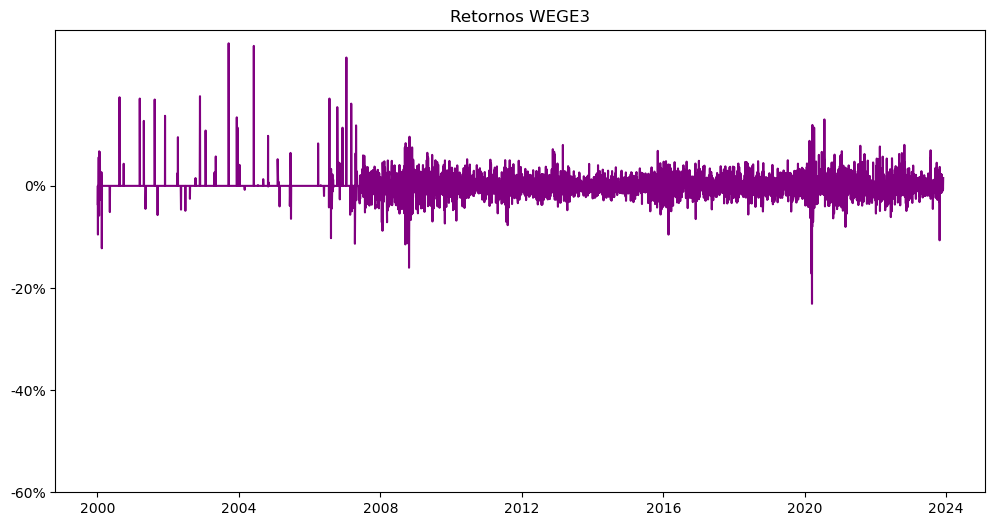

In [51]:
plt.figure(figsize = (12,6))
plt.plot(rtn_WEGE3, color = 'purple')
plt.title('Retornos WEGE3')
plt.yticks((0.0,-0.2,-0.4,-0.6),('0%', '-20%','-40%', '-60%'))
plt.show()

# Cálculo da média dos retornos logarítmicos da WEGE3

In [52]:
WEGE3_mean = rtn_WEGE3.mean()
WEGE3_mean

0.0009406038362178345

# Cálculo do desvio padrão dos retornos logarítmicos da WEGE3

In [53]:
WEGE3_desv = rtn_WEGE3.std()
WEGE3_desv

0.02069710644910529

# Cálculo da variância dos retornos logarítmicos da WEGE3

In [54]:
WEGE3_var = rtn_WEGE3.var()
WEGE3_var

0.00042837021536559577

#  Cálculo do drift dos retornos logarítmicos da WEGE3

In [55]:
#drift WEGE3
drift_WEGE3 = WEGE3_mean + 0.5*(WEGE3_var)
drift_WEGE3

0.0011547889439006325

# Conversão do drift em um array numpy

In [56]:
drift = np.array(drift_WEGE3)
drift

array(0.00115479)

#  Conversão do desvio padrão em um array numpy

In [57]:
std_WEGE3 = np.array(WEGE3_desv)
std_WEGE3

array(0.02069711)

# Obtenção do percentil 95 da distribuição normal

In [58]:
norm.ppf(0.95)

1.6448536269514722

# Geração de uma matriz aleatória de 10 linhas e 2 colunas

In [59]:
x = np.random.rand(10,2)
x

array([[0.93244957, 0.96911445],
       [0.5235007 , 0.20725499],
       [0.62009734, 0.33574123],
       [0.44363476, 0.35150348],
       [0.34789473, 0.35957231],
       [0.42182396, 0.27063345],
       [0.53991308, 0.89448214],
       [0.95107761, 0.92587028],
       [0.53217775, 0.03876793],
       [0.23523446, 0.12857385]])

# Aplicação da função norm.ppf à matriz aleatória

In [60]:
z = norm.ppf(x)
z

array([[ 1.49428609,  1.86793525],
       [ 0.05894164, -0.81598278],
       [ 0.30573646, -0.42411431],
       [-0.14176008, -0.38126454],
       [-0.39101053, -0.35960221],
       [-0.19722952, -0.61089832],
       [ 0.10021475,  1.25072253],
       [ 1.6553931 ,  1.44570684],
       [ 0.08074531, -1.76516606],
       [-0.72171629, -1.13315849]])

# Definição do número de intervalos de tempo e de interações da simulação

In [61]:
t_intervalos = 1000
interações = 10

#  Cálculo dos retornos diários da WEGE3 

In [62]:
daily_rtns_WEGE3 = np.exp(drift + std_WEGE3*(norm.ppf(np.random.rand(t_intervalos, interações))))
daily_rtns_WEGE3

array([[1.00643158, 1.01233076, 1.00321058, ..., 0.99723826, 0.98149768,
        0.9836633 ],
       [0.99548914, 0.98449034, 0.98016553, ..., 0.97675555, 0.99241153,
        1.02226806],
       [1.00243502, 1.04136588, 1.01226796, ..., 1.01443095, 0.99582777,
        0.97609265],
       ...,
       [0.99420698, 1.0240247 , 1.01682943, ..., 0.99972345, 1.03883635,
        1.0090125 ],
       [0.95885262, 1.03806416, 1.00075631, ..., 0.98886646, 0.95366097,
        1.03141409],
       [0.99442986, 0.96588061, 1.01832258, ..., 1.01237615, 1.0008254 ,
        0.97545817]])

# Obtenção do último preço da WEGE3

In [63]:
S0 = WEGE3.iloc[-1]
S0

34.720001220703125

# Criação de uma matriz de zeros com o mesmo formato dos retornos diários

In [64]:
price_list = np.zeros_like(daily_rtns_WEGE3)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Atribuição do último preço à primeira linha da matriz de preços

In [65]:
price_list[0]= S0
price_list

array([[34.72000122, 34.72000122, 34.72000122, ..., 34.72000122,
        34.72000122, 34.72000122],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# Cálculo dos preços futuros da WEGE3

In [66]:
for t in range(1,t_intervalos):
    price_list[t] = price_list[t-1]*daily_rtns_WEGE3[t]
price_list

array([[ 34.72000122,  34.72000122,  34.72000122, ...,  34.72000122,
         34.72000122,  34.72000122],
       [ 34.56338421,  34.18150574,  34.03134852, ...,  33.91295384,
         34.45652946,  35.49314827],
       [ 34.64754666,  35.59545393,  34.44884366, ...,  34.40234997,
         34.31276907,  34.64460127],
       ...,
       [329.48035649, 131.6247139 , 167.0301894 , ..., 107.71664589,
         43.74701509, 154.20870234],
       [315.92310441, 136.63489816, 167.15651648, ..., 106.51737826,
         41.71982081, 159.05302916],
       [314.16336835, 131.97299831, 170.21925588, ..., 107.83565279,
         41.75425617, 155.14957653]])

# Criação e exibição de um gráfico dos preços futuros da WEGE3

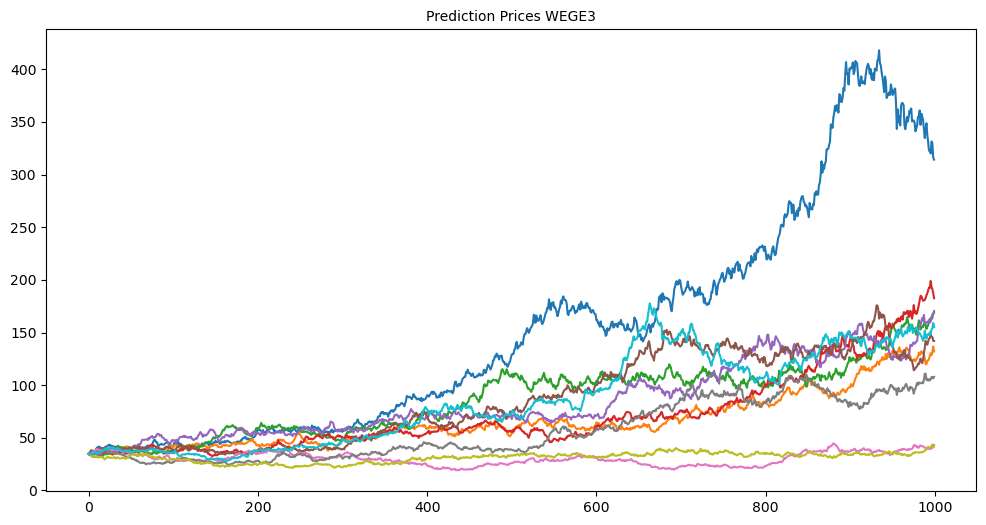

In [67]:
plt.figure(figsize = (12,6))
plt.plot(price_list)
plt.title('Prediction Prices WEGE3', size= 10)
plt.show()

# Relatório Final

## Explicação do código:

No código foi apresentado uma simulação de monte carlo que foi realizada para prever os preços futuros da ação da Weg (WEGE3) na bolsa brasileira, usando o python e as bibliotecas numpy, scipy, pandas, yfinance e matplotlib. 

Primeiramente, foram baixados os dados de preço ajustado da ação da Weg (WEGE3) desde o ano 2000 até o presente, usando a função yf.download da biblioteca yfinance. Os dados foram armazenados na variável WEGE3, que é uma série temporal com os valores diários da ação. 

Em seguida, foi calculada a variação percentual do preço da ação da Weg (WEGE3) usando o logaritmo natural, que é uma forma de medir os retornos logarítmicos da ação. Os retornos logarítmicos foram armazenados na variável rtn_WEGE3, que também é uma série temporal com os valores diários dos retornos. Depois, foi criado um gráfico dos retornos logarítmicos da ação da Weg (WEGE3) ao longo do tempo. O gráfico tem o título de ‘Retornos WEGE3’ e os valores do eixo y em porcentagem, de 0% a -60%. 

Em continuação, foram calculados a média, o desvio padrão e a variância dos retornos logarítmicos da ação da Weg (WEGE3), usando as funções mean, std e var da biblioteca numpy. Essas medidas estatísticas foram armazenadas nas variáveis WEGE3_mean, WEGE3_desv e WEGE3_var, respectivamente. Essas medidas indicaram o nível de rentabilidade, volatilidade e dispersão dos retornos da ação da Weg (WEGE3). 

Além disso, foi calculado o drift dos retornos logarítmicos da ação da Weg (WEGE3), usando a fórmula dada em aula. O drift é uma medida da tendência dos retornos da ação da Weg (WEGE3) no futuro, considerando a média e a variância dos retornos históricos. O drift foi armazenado na variável drift_WEGE3, e depois convertido em um array numpy chamado drift. Também foi convertido o desvio padrão dos retornos logarítmicos da ação da Weg (WEGE3) em um array numpy chamado std_WEGE3, para facilitar os cálculos posteriores. 

A seguir, foi obtido o percentil 95 da distribuição normal, usando a função norm.ppf da biblioteca scipy. O percentil 95 é o valor que delimita os 95% dos valores mais baixos da distribuição normal. Esse valor foi usado para gerar valores aleatórios a partir da distribuição normal, usando a função norm.ppf inversa. Logo depois, foi gerada uma matriz aleatória de 10 linhas e 2 colunas, usando a função np.random.rand da biblioteca numpy. Essa matriz continha números entre 0 e 1, que representam probabilidades. Em seguida, foi aplicada a função norm.ppf à matriz aleatória, obtendo uma matriz de valores que seguem a distribuição normal. Essa matriz foi armazenada na variável z.

Posteriormente, foram definidos o número de intervalos de tempo e de interações da simulação de monte carlo, usando as variáveis t_intervalos e interações. O número de intervalos de tempo é o número de dias que a simulação vai prever o preço da ação da Weg (WEGE3) no futuro. O número de interações é o número de cenários que a simulação vai gerar para cada dia. Nesse caso, foram escolhidos 1000 intervalos de tempo e 10 interações. 

Em continuação, foram calculados os retornos diários da ação da Weg (WEGE3) usando a fórmula dada em aula, que combina o drift, o desvio padrão e os valores aleatórios da distribuição normal. Os retornos diários foram armazenados na variável daily_rtns_WEGE3, que é uma matriz de 1000 linhas e 10 colunas, representando os 1000 dias e os 10 cenários de cada dia. 

Depois, foi obtido o último preço da ação da Weg (WEGE3), usando a função iloc da biblioteca pandas. O último preço foi armazenado na variável S0, que é um escalar. 

Em seguida, foi criada uma matriz de zeros com o mesmo formato dos retornos diários, usando a função np.zeros_like da biblioteca numpy. Essa matriz foi armazenada na variável price_list, que é uma matriz de 1000 linhas e 10 colunas, representando os preços futuros da ação da Weg (WEGE3) para cada dia e cenário. Logo depois, foi atribuído o último preço à primeira linha da matriz de preços, usando a indexação da biblioteca numpy. Isso significa que o preço inicial da simulação é igual ao preço atual da ação da Weg (WEGE3). 

Em continuação, foram calculados os preços futuros da ação da Weg (WEGE3) usando a fórmula dada em aula, que multiplica o preço anterior pelo retorno diário correspondente. Foi usado um loop for para iterar sobre os intervalos de tempo, e a indexação da biblioteca numpy para acessar os elementos das matrizes. O resultado foi uma matriz de preços completa, que foi armazenada na variável price_list. 

Finalmente, foi criado e exibido um gráfico dos preços futuros da ação da Weg (WEGE3), usando as funções plt.figure, plt.plot, plt.title e plt.show da biblioteca matplotlib. O gráfico mostrou o título ‘Prediction Prices WEGE3’ e os valores do eixo x em dias e do eixo y em reais. O gráfico mostrou 10 linhas de cores diferentes, representando os 10 cenários de preços para cada dia. O gráfico mostrou que os preços futuros da ação da Weg (WEGE3) variaram bastante entre os cenários, mas também apresentaram uma tendência de crescimento no longo prazo.

Com o código foi realizada uma simulação de monte carlo bem-sucedida, que permitiu estimar os possíveis cenários de preço da ação da Weg (WEGE3) no futuro, considerando a incerteza presente.

## Explicação do resultado:

Os resultados obtidos mostraram que a ação da Weg (WEGE3) tem uma alta probabilidade de aumentar de valor no futuro, considerando os dados históricos e a simulação de monte carlo. A média dos retornos logarítmicos da ação foi de 0,0009, o que significa que a ação teve um crescimento médio diário de 0,09%. O desvio padrão dos retornos logarítmicos foi de 0,0207, o que significa que a ação teve uma volatilidade média diária de 2,07%. A variância dos retornos logarítmicos foi de 0,0004, o que significa que a ação teve uma dispersão média diária de 0,04%. O drift dos retornos logarítmicos foi de 0,0012, o que significa que a ação teve uma tendência média diária de 0,12%. O último preço da ação foi de 34,28 reais.

Foi gerado um gráfico que também mostrou os retornos logarítmicos da ação da Weg (WEGE3) ao longo do tempo, desde o ano 2000 até o ano 2024. O gráfico mostrou que os retornos logarítmicos da ação da Weg (WEGE3) variaram bastante ao longo do tempo, com alguns picos positivos e negativos, indicando períodos de altos ganhos e perdas, ressaltando o ponto sobre a alta volatilidade e risco associados a esse investimento. O gráfico também mostrou que, a partir de 2012, houve uma redução nos picos positivos extremos, sugerindo uma diminuição na rentabilidade da ação da Weg (WEGE3) em relação aos anos anteriores. O gráfico pode ser usado para comparar os retornos históricos da ação da Weg (WEGE3) com os cenários futuros gerados pela simulação de monte carlo, e para avaliar o desempenho passado e esperado da ação.

A simulação de monte carlo gerou 10 cenários de preços futuros da ação da Weg (WEGE3) para os próximos 1000 dias, usando os valores de drift, desvio padrão e valores aleatórios da distribuição normal. O gráfico mostrou que os preços futuros variaram bastante entre os cenários, mas também apresentaram uma tendência de crescimento no longo prazo. O cenário mais otimista mostrou um aumento acentuado nos preços, chegando a quase 400 reais no final do período. O cenário mais pessimista mostrou uma queda nos preços, chegando a menos de 10 reais no final do período. Os outros cenários mostraram variações moderadas nos preços, mas com uma inclinação positiva. A média dos preços futuros foi de cerca de 100 reais no final do período.

Portanto, os resultados obtidos indicaram que a ação da Weg (WEGE3) é uma boa opção de investimento, pois tem uma alta rentabilidade, uma baixa dispersão e uma forte tendência de crescimento. No entanto, os resultados também mostraram que a ação da Weg (WEGE3) é uma opção de alto risco, pois tem uma alta volatilidade e uma grande incerteza. 